In [1]:
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline 

# Standardization

The result of standardization (or Z-score normalization) is that the features will be rescaled so that they'll have the properties of a standard normal distribution with

$\mu = 0$ and $\sigma = 1$

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:

$$ z = \frac{x - \mu}{\sigma}$$

# Normalization

An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called "normalization" - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually 0 to 1.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

$$ X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} $$

In [2]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', 
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
std_df = StandardScaler().fit(df[['Alcohol','Malic acid']])
std_df = std_df.transform(df[['Alcohol','Malic acid']])

In [5]:
norm_df = MinMaxScaler().fit(df[['Alcohol','Malic acid']])
norm_df = norm_df.transform(df[['Alcohol','Malic acid']])

In [6]:
print(f"Mean of Standaradization: {std_df.mean():.4f}")
print(f"Standard Deviation of standaradization: {std_df.std():.4f}")

Mean of Standaradization: -0.0000
Standard Deviation of standaradization: 1.0000


In [8]:
print(f"Minimum of Normalization: {norm_df.min()}")
print(f"Maximum of Normalization: {norm_df.max()}")

Minimum of Normalization: 0.0
Maximum of Normalization: 1.0


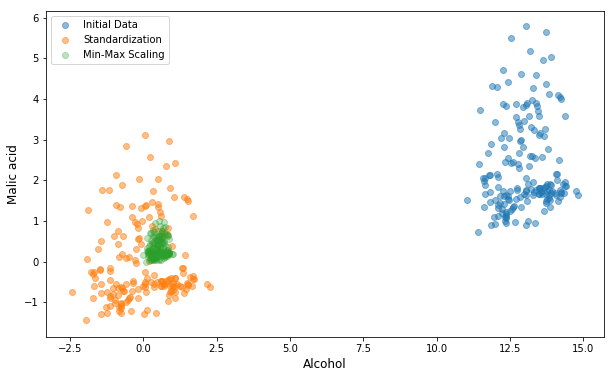

In [18]:
plt.figure(figsize = (10,6))
plt.scatter(df['Alcohol'],df['Malic acid'],alpha = 0.5, label = 'Initial Data');
plt.scatter(std_df[:,0],std_df[:,1],alpha = 0.5,label = 'Standardization');
plt.scatter(norm_df[:,0],norm_df[:,1],alpha = 0.3,label = 'Min-Max Scaling');
plt.xlabel('Alcohol',fontsize = 12);
plt.ylabel('Malic acid',fontsize = 12);
plt.legend(loc = 'best');